['C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2005.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2006.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2007.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2008.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2009.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2010.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2011.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2012.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2013.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\\SNOTEL\\415_STAND_YEAR=2014.csv', 'C:\\Users\\RAPP\\Desktop\\SPringboard Intermediate Python\

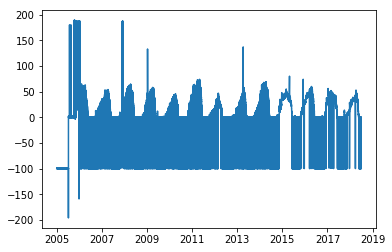

RAW SNWD DATA INFO AFTER ASFREQ and NaN FILL
count    79785.000000
mean        24.208410
std         20.179978
min          0.000000
25%          2.000000
50%         24.000000
75%         41.000000
max         80.000000
Name: SNWD.I-1 (in) , dtype: float64
2005: 53.527% out of 8760
2006: 29.772% out of 8760
2007: 27.956999999999997% out of 8760
2008: 26.867% out of 8784
2009: 47.660000000000004% out of 8760
2010: 78.014% out of 8760
2011: 39.943% out of 8760
2012: 25.990000000000002% out of 8784
2013: 15.148% out of 8760
2014: 24.189% out of 8760
2015: 19.817% out of 8760
2016: 24.476% out of 8784
2017: 19.737% out of 8760
AFTER INTERPOLATION


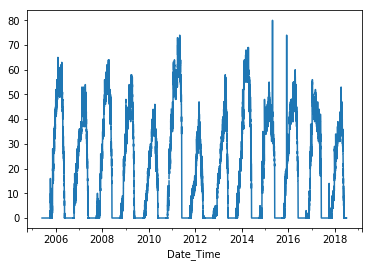

2005: 41.699999999999996% out of 8760
2006: 2.68% out of 8760
2007: 1.4500000000000002% out of 8760
2008: 1.94% out of 8784
2009: 3.3000000000000003% out of 8760
2010: 5.390000000000001% out of 8760
2011: 2.2800000000000002% out of 8760
2012: 4.1000000000000005% out of 8784
2013: 0.37% out of 8760
2014: 1.24% out of 8760
2015: 1.18% out of 8760
2016: 1.58% out of 8784
2017: 0.88% out of 8760


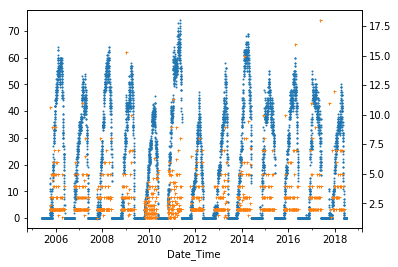

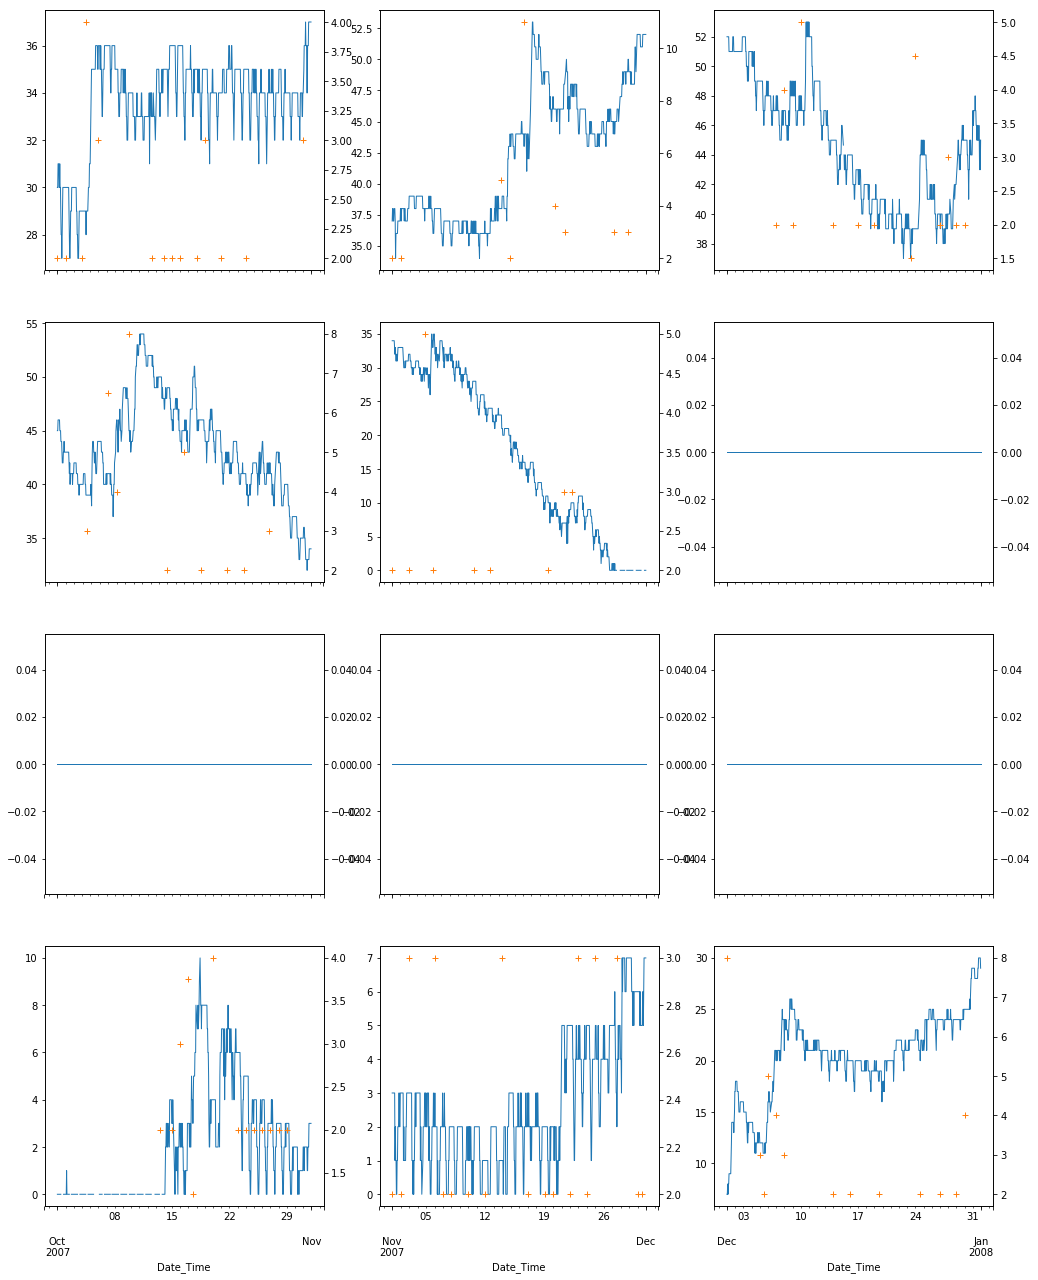

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os
from glob import glob
import datetime as dt


#import raw snotel data
snotel_files = glob(r'C:\Users\RAPP\Desktop\SPringboard Intermediate Python\SNOTEL\415_STAND_YEAR=*.csv')
print(snotel_files)


#parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d') #Dates aren't in a form python recognizes

snotel_data = [pd.read_csv(f, header=1, parse_dates=[['Date', 'Time']], index_col='Date_Time') for f in snotel_files]

snotel_df= pd.concat(snotel_data)


#Look at Raw data stats
#print(snotel_df.asfreq('Date_Time').index.difference(snotel_df.index))


print(snotel_df.head())
print(snotel_df.keys())
print(snotel_df.info())
print(snotel_df.describe())


#SNWD data info------


print('RAW SNWD DATA INFO')
print(snotel_df['SNWD.I-1 (in) '].describe())
#snotel2_df=[]


snotel_df=snotel_df.asfreq(freq='1H', fill_value=-99.0)

print('RAW SNWD DATA INFO AFTER ASFREQ')
print(snotel_df['SNWD.I-1 (in) '].describe())
#plot raw data
plt.plot(snotel_df['SNWD.I-1 (in) '])
plt.show()


#set outliers and missing value to Nan
x=(snotel_df['SNWD.I-1 (in) ']<0) | (snotel_df['SNWD.I-1 (in) ']>100) 
snotel_df['SNWD.I-1 (in) '][x]=np.NaN
print('RAW SNWD DATA INFO AFTER ASFREQ and NaN FILL')
print(snotel_df['SNWD.I-1 (in) '].describe())

years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
for year in years:
# show percent good values for each year
    print(year + ": " + str(round(snotel_df['SNWD.I-1 (in) '][year].isnull().sum()/len(snotel_df[year]),5)*100) + "% out of " + str(len(snotel_df[year])))

#set summer months to 0
for year in years:
    snotel_df['SNWD.I-1 (in) ']['06'+"-"+year] = 0
    snotel_df['SNWD.I-1 (in) ']['07'+"-"+year] = 0
    snotel_df['SNWD.I-1 (in) ']['08'+"-"+year] = 0
    snotel_df['SNWD.I-1 (in) ']['09'+"-"+year] = 0

# interpolate missing values
print('AFTER INTERPOLATION')
snotel_df['SNWD.I-1 (in) '] = snotel_df['SNWD.I-1 (in) '].interpolate(limit=4)  #want to make this such that only interpolate when < 3 hrs missing
snotel_df['SNWD.I-1 (in) '].plot()
plt.show()
for year in years:
# show percent good values for each year
    print(year + ": " + str(round(snotel_df['SNWD.I-1 (in) '][year].isnull().sum()/len(snotel_df[year]),4)*100) + "% out of " + str(len(snotel_df[year])))

#Create snow depth column which contains snow depth data every 12 hours
snotel_df['12hr_SNWD'] = snotel_df['SNWD.I-1 (in) '].resample('12H').last()
# print and plot
#print(snotel_df['12hr_SNWD'])
snotel_df['12hr_SNWD'].plot(linestyle='none', marker='o', markersize=1)

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_df['12hr-SNOWFALL'] = snotel_df['12hr_SNWD'].shift(-12)-snotel_df['12hr_SNWD']
#only keep snowfall totals greater then 1"
zz=(snotel_df['12hr-SNOWFALL']>1)
snotel_df['12hr-SNOWFALL']=snotel_df['12hr-SNOWFALL'][zz]
snotel_df['12hr-SNOWFALL'].plot(secondary_y=True, marker='+', markersize=3)
plt.show()
#print(snotel_df['1hr-SNOWFALL'])


plt.figure(figsize=(17,22))
plt.subplot(4, 3, 1)
snotel_df['SNWD.I-1 (in) ']['01-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['01-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 2)
snotel_df['SNWD.I-1 (in) ']['02-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['02-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 3)
snotel_df['SNWD.I-1 (in) ']['03-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['03-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 4) 
snotel_df['SNWD.I-1 (in) ']['04-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['04-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 5) 
snotel_df['SNWD.I-1 (in) ']['05-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['05-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 6) 
snotel_df['SNWD.I-1 (in) ']['06-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['06-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 7) 
snotel_df['SNWD.I-1 (in) ']['07-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['07-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 8) 
snotel_df['SNWD.I-1 (in) ']['08-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['08-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 9) 
snotel_df['SNWD.I-1 (in) ']['09-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['09-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 10) 
snotel_df['SNWD.I-1 (in) ']['10-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['10-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 11) 
snotel_df['SNWD.I-1 (in) ']['11-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['11-2007'].plot(use_index=True, secondary_y=True, marker='+')
plt.subplot(4, 3, 12) 
snotel_df['SNWD.I-1 (in) ']['12-2007'].plot(use_index=True, linewidth=1)
snotel_df['12hr-SNOWFALL']['12-2007'].plot(use_index=True, secondary_y=True, marker='+')


plt.savefig('SNWD_2006.png')
plt.show()

#plt.plot(snotel_df['SNWD.I-1 (in) ']['09-2005':'05-2006'], 'red')
    
#snotel_df[['SNWD.I-1 (in) ']

